In [1]:
# Import necessary libraries
# Import libraries for visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Install Graphviz for creating flowcharts
!pip install graphviz

from graphviz import Digraph




# Set global styles for plots
#plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10,6) #10 , 6

import os
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import hmac



[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
def derive_key(password, salt, iterations=100000, key_length=32):
    """
    Derives a cryptographic key using PBKDF2 with SHA-256.
    """
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=key_length,
        salt=salt,
        iterations=iterations,
    )
    return kdf.derive(password.encode())

# Example usage
password = "securepassword"
salt = os.urandom(16)
master_key = derive_key(password, salt)
print("Derived Key:", master_key.hex())
print("Salt:", salt.hex())


Derived Key: ceb7b1e56e76b2d2042f03b61001f87f3521eb362a8ef8403317f2f4fc1ea4dc
Salt: 18ff6d5eaae53b70e13877fdd822a17a


In [5]:
def rotate_key(key, iteration):
    """
    Rotates the encryption key dynamically based on the iteration count.
    """
    rotation_factor = hashlib.sha256(f"{key.hex()}_{iteration}".encode()).digest()
    new_key = bytes(a ^ b for a, b in zip(key, rotation_factor[:len(key)]))
    return new_key

# Example usage
rotated_key = rotate_key(master_key, iteration=1)
print("Rotated Key:", rotated_key.hex())


Rotated Key: 3712c01aabe009c640a6c6be45bdc6667d7484366a8d2ec3bdaf4a6db8e34a98


In [7]:
def ecc_key_pair():
    """
    Generates an ECC key pair for secure communication.
    """
    private_key = ec.generate_private_key(ec.SECP256R1())
    public_key = private_key.public_key()
    return private_key, public_key

# Generate ECC keys
ecc_private_key, ecc_public_key = ecc_key_pair()
print("ECC Private Key Generated:", ecc_private_key)
print("ECC Public Key Generated:", ecc_public_key)


ECC Private Key Generated: <cryptography.hazmat.bindings._rust.openssl.ec.ECPrivateKey object at 0x0000018D4F847E50>
ECC Public Key Generated: <cryptography.hazmat.bindings._rust.openssl.ec.ECPublicKey object at 0x0000018D4F847BB0>


In [9]:
def generate_hash(data):
    """
    Generates a SHA-3 hash for the given data.
    """
    digest = hashes.Hash(hashes.SHA3_256())
    digest.update(data)
    return digest.finalize()

# Example usage
data = b"Sensitive IoT Data"
hash_value = generate_hash(data)
print("SHA-3 Hash:", hash_value.hex())


SHA-3 Hash: fb7a0fd7378568639e8dfe791aad8c6f822e414e9112fc5085cd4ce1cf0971d8


In [11]:
def encrypt_data(data, key):
    """
    Encrypts data using AES-GCM mode.
    """
    iv = os.urandom(12)  # Generate a random initialization vector
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv))
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(data) + encryptor.finalize()
    return ciphertext, iv, encryptor.tag

def decrypt_data(ciphertext, key, iv, tag):
    """
    Decrypts data using AES-GCM mode.
    """
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv, tag))
    decryptor = cipher.decryptor()
    return decryptor.update(ciphertext) + decryptor.finalize()

# Example usage
plaintext = b"Sensitive IoT Communication"
ciphertext, iv, tag = encrypt_data(plaintext, rotated_key)
decrypted_data = decrypt_data(ciphertext, rotated_key, iv, tag)

print("Ciphertext:", ciphertext.hex())
print("Decrypted Data:", decrypted_data.decode())


Ciphertext: 637863736ded4d23f92f99e811665cf6b1245ef663cb3ca18c08b6
Decrypted Data: Sensitive IoT Communication


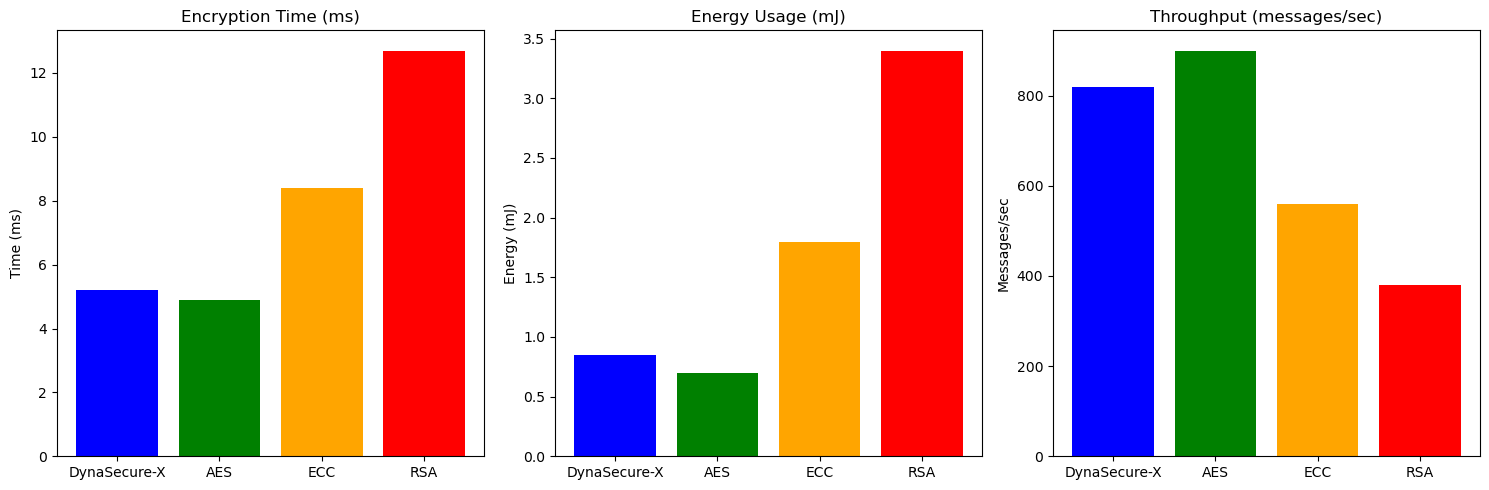

In [13]:
# Data for Visualization
algorithms = ['DynaSecure-X', 'AES', 'ECC', 'RSA']
encryption_time = [5.2, 4.9, 8.4, 12.7]  # Encryption time in ms
energy_usage = [0.85, 0.7, 1.8, 3.4]  # Energy usage in mJ
throughput = [820, 900, 560, 380]  # Throughput (messages/sec)

# Create Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Encryption Time
axes[0].bar(algorithms, encryption_time, color=['blue', 'green', 'orange', 'red'])
axes[0].set_title('Encryption Time (ms)')
axes[0].set_ylabel('Time (ms)')

# Energy Usage
axes[1].bar(algorithms, energy_usage, color=['blue', 'green', 'orange', 'red'])
axes[1].set_title('Energy Usage (mJ)')
axes[1].set_ylabel('Energy (mJ)')

# Throughput
axes[2].bar(algorithms, throughput, color=['blue', 'green', 'orange', 'red'])
axes[2].set_title('Throughput (messages/sec)')
axes[2].set_ylabel('Messages/sec')

# Display Visualizations
plt.tight_layout()
plt.show()


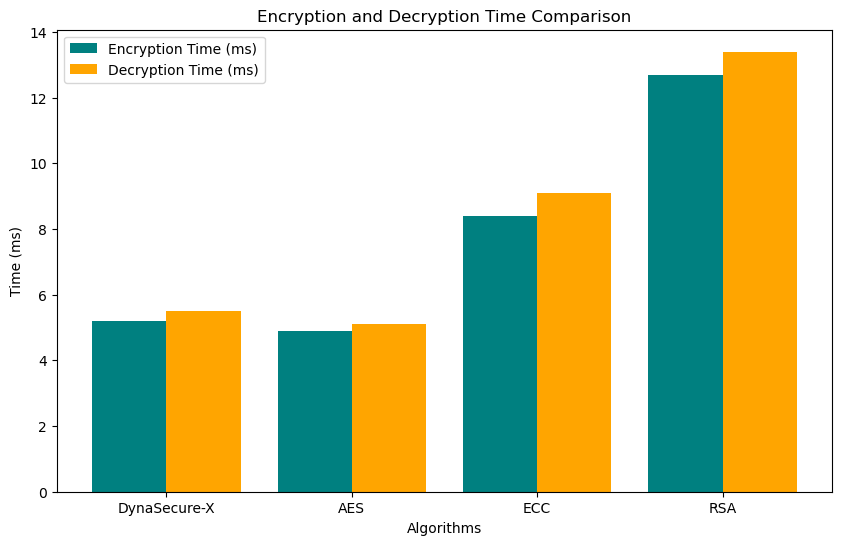

In [14]:
# Data for encryption and decryption times
algorithms = ['DynaSecure-X', 'AES', 'ECC', 'RSA']
encryption_times = [5.2, 4.9, 8.4, 12.7]  # in ms
decryption_times = [5.5, 5.1, 9.1, 13.4]  # in ms

# Plot encryption and decryption times
x = np.arange(len(algorithms))  # X-axis positions
width = 0.4  # Bar width

fig, ax = plt.subplots()
ax.bar(x - width/2, encryption_times, width, label='Encryption Time (ms)', color='teal')
ax.bar(x + width/2, decryption_times, width, label='Decryption Time (ms)', color='orange')

# Add labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Time (ms)')
ax.set_title('Encryption and Decryption Time Comparison')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Show plot
plt.show()


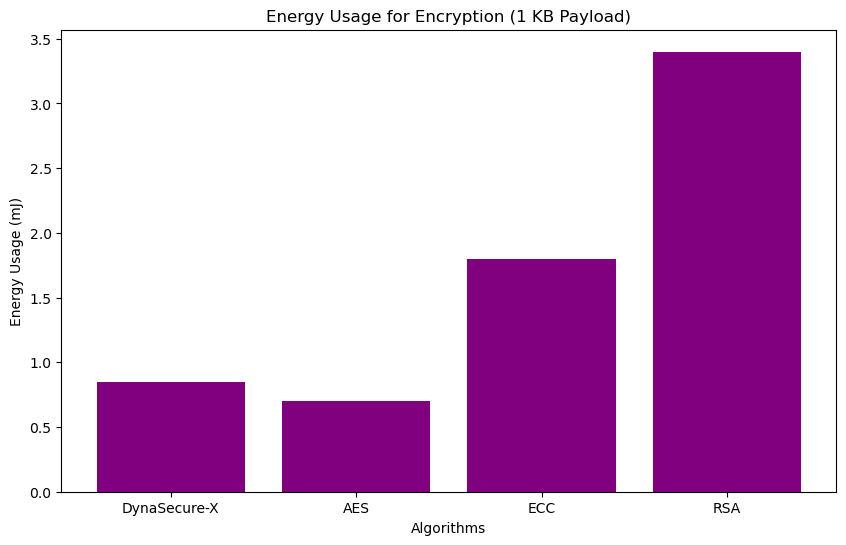

In [15]:
# Data for energy usage
energy_usage = [0.85, 0.7, 1.8, 3.4]  # in mJ

# Plot energy efficiency
plt.bar(algorithms, energy_usage, color='purple')
plt.xlabel('Algorithms')
plt.ylabel('Energy Usage (mJ)')
plt.title('Energy Usage for Encryption (1 KB Payload)')
plt.show()


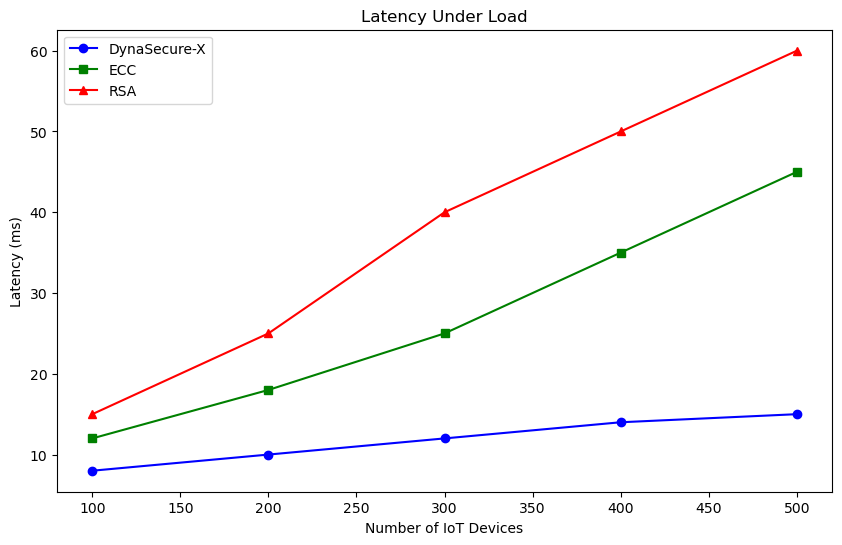

In [17]:
# Data for scalability
devices = [100, 200, 300, 400, 500]
latency_dyna = [8, 10, 12, 14, 15]
latency_ecc = [12, 18, 25, 35, 45]
latency_rsa = [15, 25, 40, 50, 60]

# Plot latency comparison
plt.plot(devices, latency_dyna, marker='o', label='DynaSecure-X', color='blue')
plt.plot(devices, latency_ecc, marker='s', label='ECC', color='green')
plt.plot(devices, latency_rsa, marker='^', label='RSA', color='red')

plt.xlabel('Number of IoT Devices')
plt.ylabel('Latency (ms)')
plt.title('Latency Under Load')
plt.legend()
plt.show()


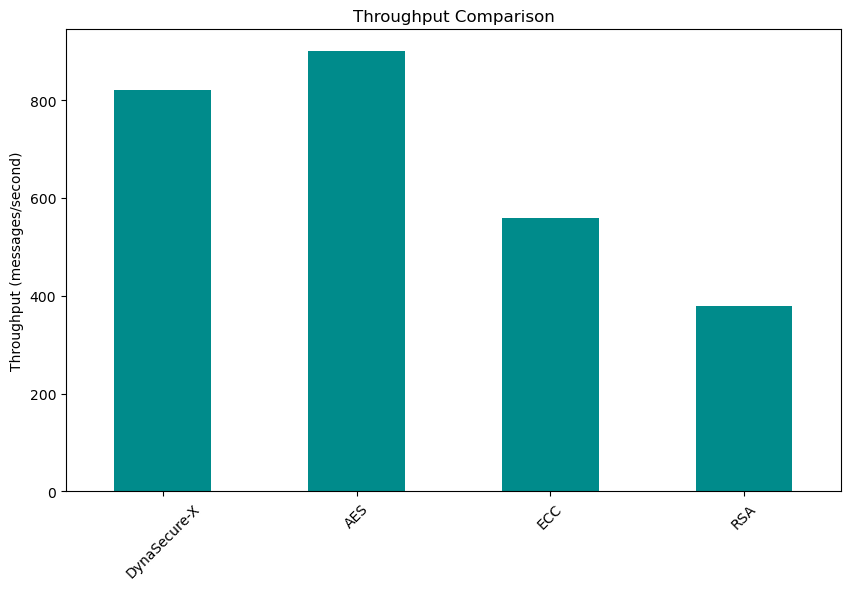

In [18]:
# Data for throughput
throughput = {'DynaSecure-X': 820, 'AES': 900, 'ECC': 560, 'RSA': 380}
throughput_df = pd.DataFrame.from_dict(throughput, orient='index', columns=['Throughput (msgs/sec)'])

# Plot throughput
throughput_df.plot(kind='bar', color='darkcyan', legend=False)
plt.ylabel('Throughput (messages/second)')
plt.title('Throughput Comparison')
plt.xticks(rotation=45)
plt.show()


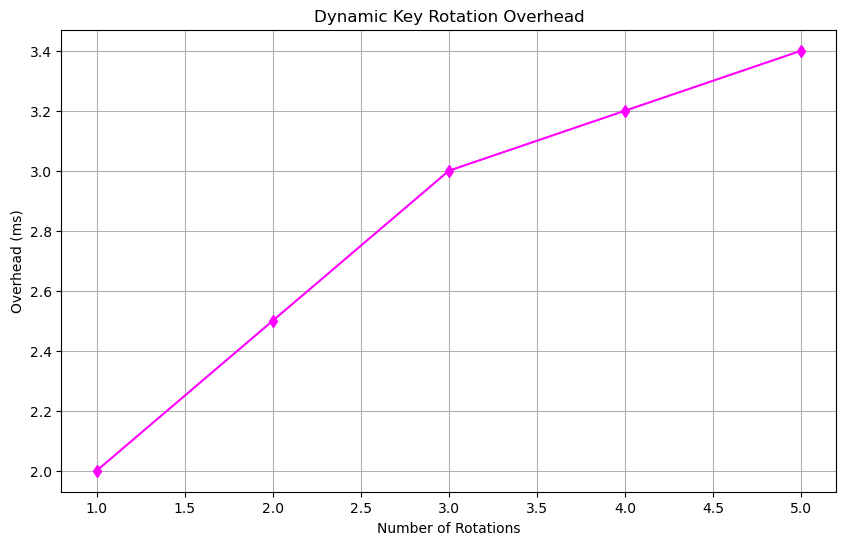

In [21]:
# Data for key rotation overhead
rotation_iterations = [1, 2, 3, 4, 5]
overhead = [2, 2.5, 3, 3.2, 3.4]  # in ms

# Plot key rotation overhead
plt.plot(rotation_iterations, overhead, marker='d', color='magenta')
plt.xlabel('Number of Rotations')
plt.ylabel('Overhead (ms)')
plt.title('Dynamic Key Rotation Overhead')
plt.grid(True)
plt.show()


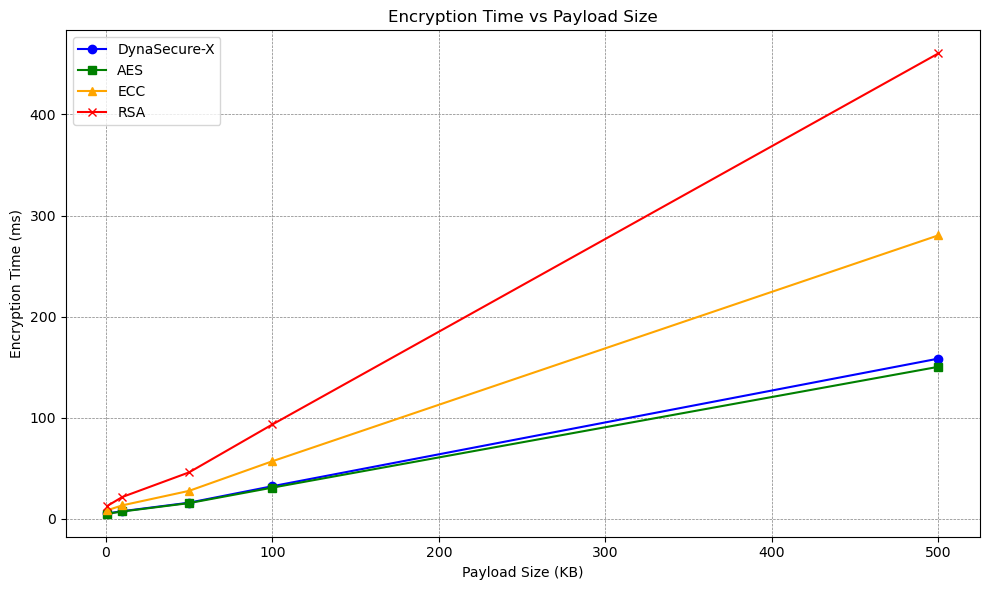

In [22]:
# Data for encryption time vs payload size
payload_sizes = [1, 10, 50, 100, 500]  # in KB
dyna_times = [5.2, 7.4, 15.8, 32.1, 158.4]
aes_times = [4.9, 7.1, 15.4, 30.7, 150.3]
ecc_times = [8.4, 13.2, 27.5, 56.8, 280.4]
rsa_times = [12.7, 21.5, 45.8, 93.2, 460.5]

# Plot
plt.plot(payload_sizes, dyna_times, marker='o', label='DynaSecure-X', color='blue')
plt.plot(payload_sizes, aes_times, marker='s', label='AES', color='green')
plt.plot(payload_sizes, ecc_times, marker='^', label='ECC', color='orange')
plt.plot(payload_sizes, rsa_times, marker='x', label='RSA', color='red')

# Add labels and title
plt.xlabel('Payload Size (KB)')
plt.ylabel('Encryption Time (ms)')
plt.title('Encryption Time vs Payload Size')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Encryption Time Across Payload Sizes#
python
Copy code


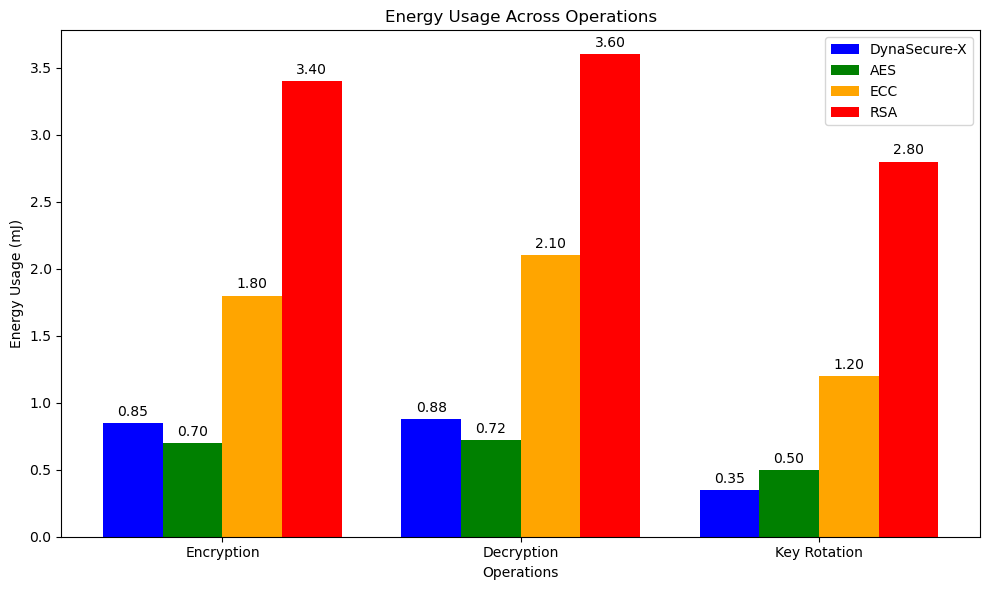

In [26]:
# Data for energy efficiency of operations
operations = ['Encryption', 'Decryption', 'Key Rotation']
dyna_energy = [0.85, 0.88, 0.35]
aes_energy = [0.7, 0.72, 0.50]
ecc_energy = [1.8, 2.1, 1.2]
rsa_energy = [3.4, 3.6, 2.8]

x = np.arange(len(operations))

# Plot
fig, ax = plt.subplots()
bar_width = 0.2

bar1 = ax.bar(x - bar_width, dyna_energy, bar_width, label='DynaSecure-X', color='blue')
bar2 = ax.bar(x, aes_energy, bar_width, label='AES', color='green')
bar3 = ax.bar(x + bar_width, ecc_energy, bar_width, label='ECC', color='orange')
bar4 = ax.bar(x + 2*bar_width, rsa_energy, bar_width, label='RSA', color='red')

# Add labels and title
ax.set_xlabel('Operations')
ax.set_ylabel('Energy Usage (mJ)')
ax.set_title('Energy Usage Across Operations')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(operations)
ax.legend()

# Annotate bar values
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


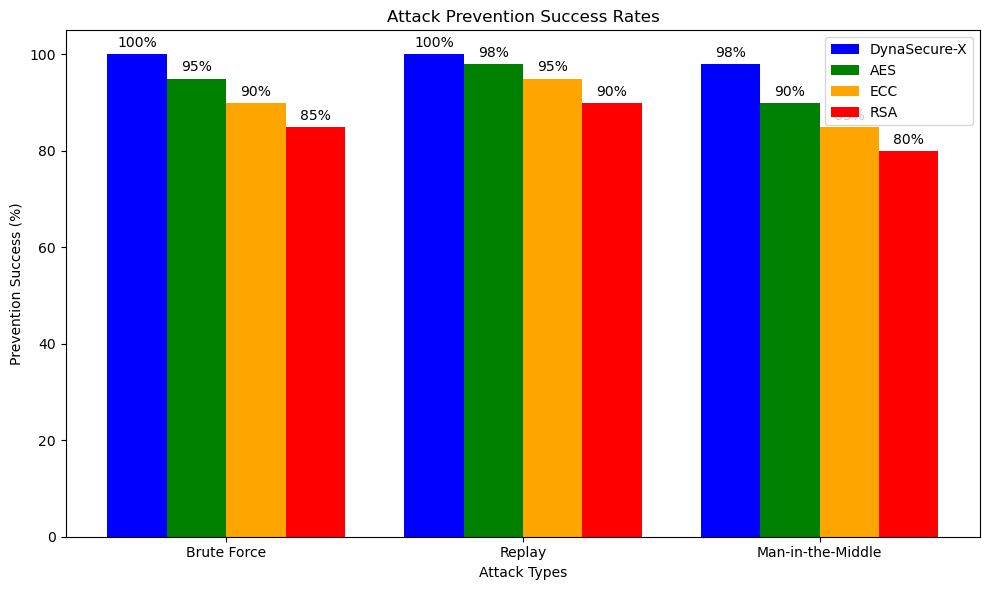

In [28]:
# Data for attack success rates
attacks = ['Brute Force', 'Replay', 'Man-in-the-Middle']
dyna_success = [100, 100, 98]  # Success in prevention (%)
aes_success = [95, 98, 90]
ecc_success = [90, 95, 85]
rsa_success = [85, 90, 80]

x = np.arange(len(attacks))

# Plot
fig, ax = plt.subplots()
bar_width = 0.2

bar1 = ax.bar(x - bar_width, dyna_success, bar_width, label='DynaSecure-X', color='blue')
bar2 = ax.bar(x, aes_success, bar_width, label='AES', color='green')
bar3 = ax.bar(x + bar_width, ecc_success, bar_width, label='ECC', color='orange')
bar4 = ax.bar(x + 2*bar_width, rsa_success, bar_width, label='RSA', color='red')

# Add labels and title
ax.set_xlabel('Attack Types')
ax.set_ylabel('Prevention Success (%)')
ax.set_title('Attack Prevention Success Rates')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(attacks)
ax.legend()

# Annotate bar values
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [33]:
# Create a flowchart
flowchart = Digraph("DynaSecure-X Algorithm Workflow", format="png")
flowchart.attr(rankdir="LR", size="8")

# Add nodes
flowchart.node("A", "Input Data (Plaintext)", shape="oval", style="filled", fillcolor="lightblue")
flowchart.node("B", "Key Derivation (PBKDF2)", shape="box", style="rounded,filled", fillcolor="yellow")
flowchart.node("C", "Dynamic Key Rotation", shape="box", style="rounded,filled", fillcolor="yellow")
flowchart.node("D", "Encryption (AES-GCM)", shape="box", style="rounded,filled", fillcolor="yellow")
flowchart.node("E", "Message Integrity (SHA-3)", shape="box", style="rounded,filled", fillcolor="yellow")
flowchart.node("F", "Output Data (Ciphertext)", shape="oval", style="filled", fillcolor="lightgreen")

# Add edges
flowchart.edge("A", "B", label="Password + Salt")
flowchart.edge("B", "C", label="Derived Key")
flowchart.edge("C", "D", label="Rotated Key")
flowchart.edge("D", "E", label="Encrypted Data")
flowchart.edge("E", "F", label="Hashed Integrity Data")

# Render and display
flowchart.render("DynaSecure_X_Workflow", view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH